In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Vaani/Copy of cicids2017_cleaned.csv")
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Attack Type
0,22,1266342,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
1,22,1319353,41,2664,456,0,64.975610,109.864573,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
2,22,160,1,0,0,0,0.000000,0.000000,0,0,...,243,0,32,0.0,0,0,0.0,0,0,Normal Traffic
3,22,1303488,41,2728,456,0,66.536585,110.129945,976,0,...,243,24,32,0.0,0,0,0.0,0,0,Normal Traffic
4,35396,77,1,0,0,0,0.000000,0.000000,0,0,...,290,0,32,0.0,0,0,0.0,0,0,Normal Traffic


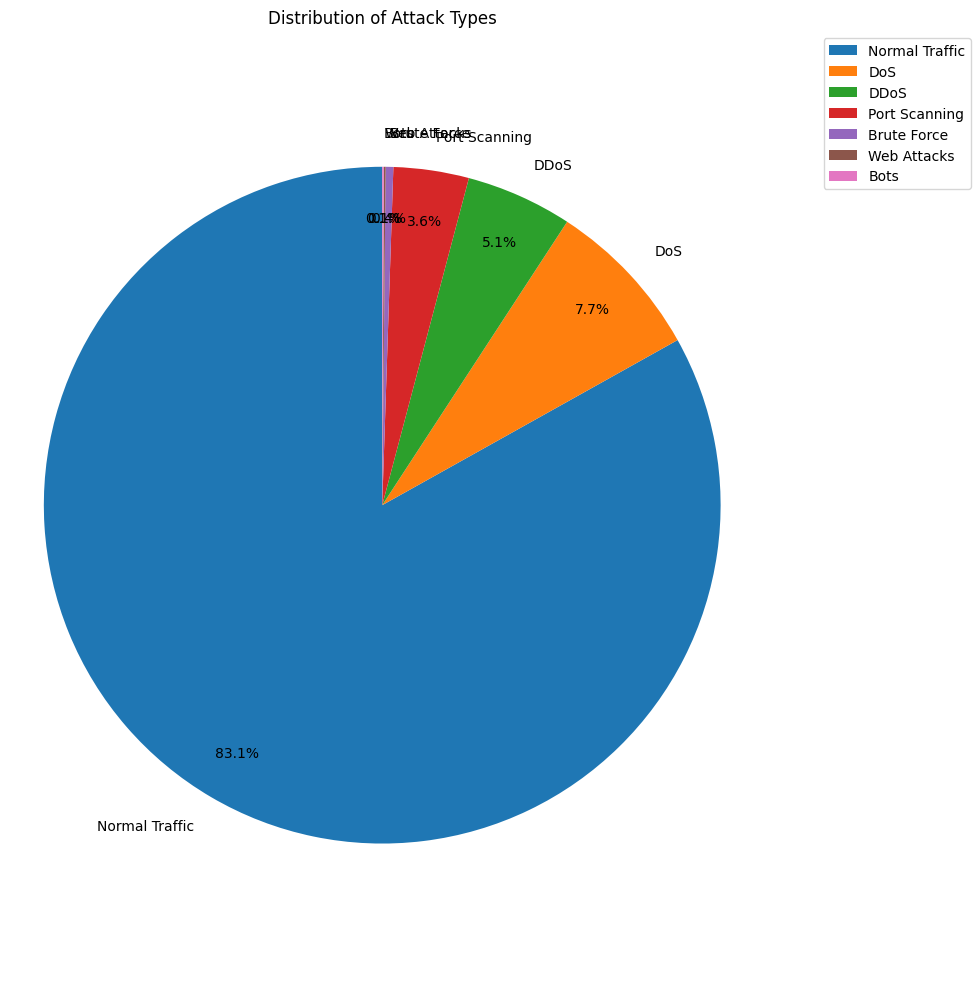

In [7]:
# prompt: Generate a pi chart of distribution of attack type from the following. Can you make sure that the labels don't coincide and smudge print the percentages and keep a legend

import matplotlib.pyplot as plt

# Assuming 'Label' column contains the attack types
attack_counts = df['Attack Type'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))  # Adjust figure size for better visualization
plt.pie(attack_counts, labels=attack_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, labeldistance=1.1)
plt.title('Distribution of Attack Types')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1)) # Adjusted legend location
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout() # Prevents labels from overlapping
plt.show()


In [9]:
# prompt: Print percentages of each attack type

# Assuming 'Label' column contains the attack types
attack_counts = df['Attack Type'].value_counts(normalize=True) * 100
attack_counts


,proportion
Attack Type,
Normal Traffic,83.112414
DoS,7.686003
DDoS,5.078407
Port Scanning,3.597896
Brute Force,0.362987
Web Attacks,0.085014
Bots,0.077279


In [ ]:
X = df.drop(['Attack Type'], axis=1)
y = df['Attack Type']

In [ ]:
from sklearn.model_selection import train_test_split

# Perform a stratified split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

# Check class distribution
from collections import Counter

print("Train class distribution:", Counter(y_train))
print("Val class distribution:", Counter(y_val))

Training set size: 2016600
Validation set size: 504151
Train class distribution: Counter({'Normal Traffic': 1676045, 'DoS': 154996, 'DDoS': 102411, 'Port Scanning': 72555, 'Brute Force': 7320, 'Web Attacks': 1714, 'Bots': 1559})
Val class distribution: Counter({'Normal Traffic': 419012, 'DoS': 38749, 'DDoS': 25603, 'Port Scanning': 18139, 'Brute Force': 1830, 'Web Attacks': 429, 'Bots': 389})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

undersample = RandomUnderSampler(sampling_strategy={
    'Normal Traffic': 1350000,  # Reduce, but keep enough
    'DoS': 154996,  # Keep as is
    'DDoS': 102411,
    'Port Scanning': 72555,
    'Brute Force': 7320,
    'Web Attacks': 1714,
    'Bots': 1559
}, random_state=42)

X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={
    'Web Attacks': 15000,
    'Bots': 15000,
    'Brute Force': 30000
}, random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_resampled, y_train_resampled)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_resampled),
    y=y_train_resampled
)
class_weight_dict = dict(zip(np.unique(y_train_resampled), class_weights))

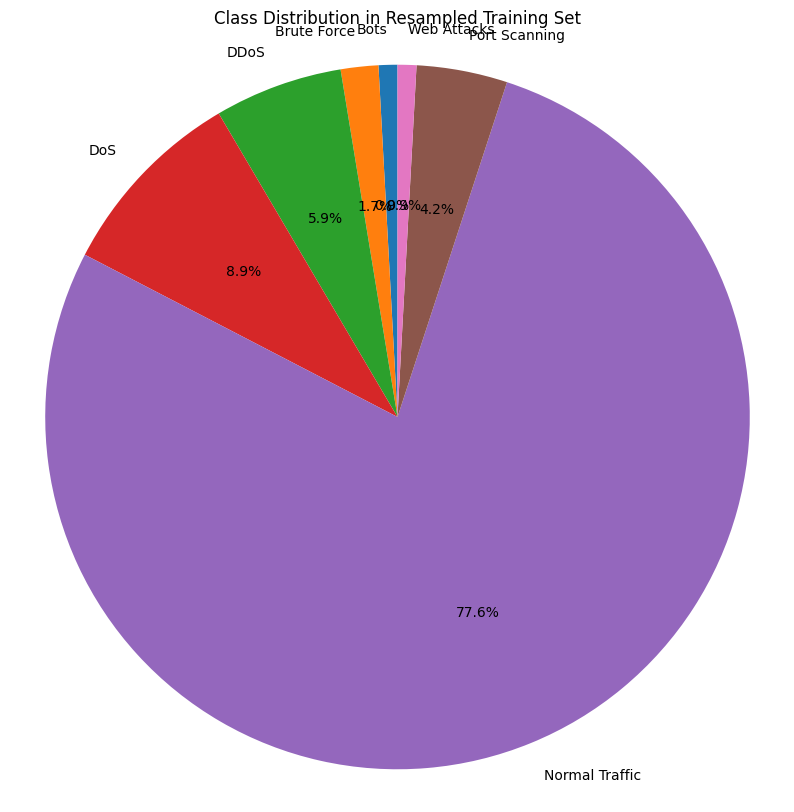

In [ ]:
# prompt: Draw a piechart of the sampled data

# Assuming 'y_train_resampled' contains the class labels for the resampled training set
train_class_distribution = Counter(y_train_resampled)

labels = list(train_class_distribution.keys())
sizes = list(train_class_distribution.values())

plt.figure(figsize=(10, 10))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in Resampled Training Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Step 1: Get current class counts
class_counts = Counter(y_train)

# Step 2: Find the maximum count
max_count = max(class_counts.values())

# Step 3: Create sampling strategy to boost all classes to max_count
sampling_strategy = {cls: max_count for cls in class_counts}

# Step 4: Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Optional: Check new distribution
print("Balanced class distribution:", Counter(y_train_balanced))


In [ ]:
print(pd.Series(y_train_resampled).value_counts())

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels (string → integer)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)  # Train labels
y_val_encoded = label_encoder.transform(y_val)

In [ ]:
import numpy as np

# Get unique class counts in train and validation sets
train_counts = np.bincount(y_train_encoded)
val_counts = np.bincount(y_val_encoded)

# Print label counts
print("Train Label Counts:")
for label, count in zip(np.unique(y_train_encoded), train_counts):
    print(f"  Class {label}: {count} samples")

print("\nValidation Label Counts:")
for label, count in zip(np.unique(y_val_encoded), val_counts):
    print(f"  Class {label}: {count} samples")

In [ ]:
# prompt: import seaborn

import seaborn as sns


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np

# Parameters
n_estimators = 100

# Initialize the classifier with warm_start=True
rf_classifier = RandomForestClassifier(
    n_estimators=1,
    warm_start=True,
    random_state=42,
    n_jobs=-1  # parallelize across CPUs
)

# Train the classifier incrementally with a progress bar
for i in tqdm(range(1, n_estimators + 1), desc="Training Random Forest"):
    rf_classifier.n_estimators = i
    rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate the model
print(classification_report(y_val, y_pred))


In [ ]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title("Top 20 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import numpy as np

# Initialize parameters
params = {
    'objective': 'multi:softprob',
    'num_class': len(np.unique(y_train_resampled)),
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'eval_metric': 'mlogloss'
}

num_boost_round = 100

# Encode target labels (string → integer) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_val_encoded = label_encoder.transform(y_val)

# Convert to DMatrix using encoded labels
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_encoded)
dval = xgb.DMatrix(X_val, label=y_val_encoded)

# Training with progress bar
progress_bar = tqdm(total=num_boost_round, desc="Training XGBoost")
evals_result = {}

# Define a custom callback class inheriting from TrainingCallback
class TqdmCallback(xgb.callback.TrainingCallback):
    def __init__(self, progress_bar):
        self.progress_bar = progress_bar

    def after_iteration(self, model, epoch, evals_log):
        self.progress_bar.update(1)
        return False  # Return False to continue training


bst = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dval, 'validation')],
    evals_result=evals_result,
    verbose_eval=False,
    callbacks=[TqdmCallback(progress_bar)] # Use the custom callback class
)
progress_bar.close()

# Predict and evaluate (using encoded labels for evaluation)
y_val_pred = np.argmax(bst.predict(dval), axis=1)

# Decode predictions back to original labels for classification_report
y_val_pred_decoded = label_encoder.inverse_transform(y_val_pred)
val_accuracy = accuracy_score(y_val, y_val_pred_decoded)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training accuracy (using encoded labels)
y_train_pred = np.argmax(bst.predict(dtrain), axis=1)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

print(classification_report(y_val, y_val_pred_decoded))

# Save the model
bst.save_model('xgboost_model.json')

In [ ]:
from sklearn.metrics import accuracy_score
import joblib

# Save the trained model
joblib.dump(rf_classifier, 'random_forest_model.pkl')

# Generate validation accuracy
val_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate training predictions and accuracy
y_train_pred = rf_classifier.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")



In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Encode labels if they aren't numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_resampled)
y_val_encoded = label_encoder.transform(y_val)

# One-hot encode the labels
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)
num_classes = y_train_categorical.shape[1]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

# Reshape for Conv1D: (samples, timesteps, features)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)

# Define CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    X_train_cnn, y_train_categorical,
    validation_data=(X_val_cnn, y_val_categorical),
    epochs=30,
    batch_size=64,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=1
)

# Evaluate
y_pred_probs = model.predict(X_val_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_val_encoded, y_pred, target_names=label_encoder.classes_))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert training data (balanced dataset)
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)

# Convert validation data (original dataset)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)

# Create DataLoaders
batch_size = 64 # <-- SET YOUR BATCH SIZE
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=8, pin_memory=True, prefetch_factor=4)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

class EnhancedCNN_BiLSTM(nn.Module):
    def __init__(self, num_classes, input_size=52):
        super(EnhancedCNN_BiLSTM, self).__init__()

        # Expanded CNN layers with residual connections
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.2)

        self.conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.2)

        self.conv3 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(128)

        # Residual connection components
        self.res_conv1 = nn.Conv1d(in_channels=1, out_channels=128, kernel_size=1)
        self.res_conv2 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=1)
        self.res_conv3 = nn.Conv1d(in_channels=256, out_channels=128, kernel_size=1)

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        # Calculate the size after pooling
        self.lstm_input_size = 128 * (input_size // 4)  # After two pooling layers

        # Deeper BiLSTM
        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=128,
            num_layers=2,  # Increased from 1 to 2
            batch_first=True,
            bidirectional=True,
            dropout=0.2  # Dropout between LSTM layers
        )
        self.dropout3 = nn.Dropout(0.3)

        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(256, 64),  # 256 = 128*2 (bidirectional)
            nn.Tanh(),
            nn.Linear(64, 1)
        )

        # Expanded FC layers
        self.fc1 = nn.Linear(256, 128)  # 256 = 128*2 (bidirectional)
        self.dropout4 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # Input shape: [batch_size, features]
        x = x.unsqueeze(1)  # Add channel dimension: [batch_size, 1, features]

        # Residual block 1
        res1 = self.res_conv1(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = x + res1  # Residual connection
        x = self.pool(x)
        x = self.dropout1(x)

        # Residual block 2
        res2 = self.res_conv2(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = x + res2  # Residual connection
        x = self.pool(x)
        x = self.dropout2(x)

        # Residual block 3
        res3 = self.res_conv3(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = x + res3  # Residual connection

        # Reshape for LSTM: [batch_size, seq_len, features]
        x = x.permute(0, 2, 1)

        # BiLSTM processing
        lstm_out, _ = self.lstm(x)
        lstm_out = self.dropout3(lstm_out)

        # Attention mechanism
        attn_weights = self.attention(lstm_out)
        attn_weights = torch.softmax(attn_weights, dim=1)
        context = torch.sum(attn_weights * lstm_out, dim=1)

        # Classification layers
        x = self.relu(self.fc1(context))
        x = self.dropout4(x)
        x = self.fc2(x)

        return x

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR

num_classes = len(label_encoder.classes_)


# Define model, loss, optimizer
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to("cuda")

model = EnhancedCNN_BiLSTM(num_classes).to("cuda")
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# LR Scheduler: Reduce LR if validation accuracy plateaus
total_steps = len(train_loader) * 30
scheduler = OneCycleLR(
    optimizer,
    max_lr=0.005,
    total_steps=total_steps,
    pct_start=0.3,
    div_factor=25,
    final_div_factor=1000
)

In [ ]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau

best_val_acc = 0
epochs_no_improve = 0
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
num_epochs = 15
patience = 15
min_delta = 0.001  # Minimum accuracy improvement to consider
max_grad_norm = 1.0  # Gradient clipping threshold

# --- Training Loop ---
for epoch in range(num_epochs):
    model.train()
    train_loss, train_correct, train_total = 0, 0, 0

    # Training Phase
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)
    for X_batch, y_batch in loop:
        X_batch, y_batch = X_batch.to("cuda"), y_batch.to("cuda")

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()

        # Gradient Clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)

        optimizer.step()

        # Update metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        batch_acc = (predicted == y_batch).sum().item()/y_batch.size(0)
        train_total += y_batch.size(0)
        train_correct += (predicted == y_batch).sum().item()

        # Enhanced progress bar
        loop.set_postfix({
            'loss': f"{loss.item():.4f}",
            'acc': f"{batch_acc:.2%}",
            'lr': f"{optimizer.param_groups[0]['lr']:.2e}"
        })

    # Calculate epoch metrics
    train_acc = train_correct / train_total * 100
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # Validation Phase
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to("cuda"), y_batch.to("cuda")
            outputs = model(X_batch)

            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += y_batch.size(0)
            val_correct += (predicted == y_batch).sum().item()

    val_acc = val_correct / val_total * 100
    avg_val_loss = val_loss / len(val_loader)
    scheduler.step(avg_val_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    # Epoch summary
    current_lr = optimizer.param_groups[0]['lr']
    print(f"\nEpoch [{epoch+1}/{num_epochs}] → "
          f"Train Loss: {avg_train_loss:.4f}, Acc: {train_acc:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f}, Acc: {val_acc:.2f}% | "
          f"LR: {current_lr:.2e}")

    # Save best model
    if val_acc > best_val_acc + min_delta:
        torch.save(model.state_dict(), "nids_v10_best.pth")
        print(f"💾 New best model saved ({val_acc:.2f}%)")
        best_val_acc = val_acc
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Early stopping check
    if epochs_no_improve >= patience:
        print(f"⏹️ Early stopping at epoch {epoch+1} (No improvement for {patience} epochs)")
        break

# Final Report
print(f"\n🏆 Best Validation Accuracy: {best_val_acc:.2f}%")

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train", marker="o")
plt.plot(val_losses, label="Val", marker="o")
plt.title("Loss Curves"), plt.xlabel("Epoch"), plt.ylabel("Loss"), plt.legend(), plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train", marker="o")
plt.plot(val_accuracies, label="Val", marker="o")
plt.title("Accuracy Curves"), plt.xlabel("Epoch"), plt.ylabel("Accuracy (%)"), plt.legend(), plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau

best_val_acc = 97.02
epochs_no_improve = 0
num_epochs = 30
patience = 15
min_delta = 0.001  # Minimum accuracy improvement to consider
max_grad_norm = 1.0  # Gradient clipping threshold

# --- Training Loop ---
for epoch in range(15, num_epochs):
    model.train()
    train_loss, train_correct, train_total = 0, 0, 0

    # Training Phase
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)
    for X_batch, y_batch in loop:
        X_batch, y_batch = X_batch.to("cuda"), y_batch.to("cuda")

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()

        # Gradient Clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)

        optimizer.step()

        # Update metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        batch_acc = (predicted == y_batch).sum().item()/y_batch.size(0)
        train_total += y_batch.size(0)
        train_correct += (predicted == y_batch).sum().item()

        # Enhanced progress bar
        loop.set_postfix({
            'loss': f"{loss.item():.4f}",
            'acc': f"{batch_acc:.2%}",
            'lr': f"{optimizer.param_groups[0]['lr']:.2e}"
        })

    # Calculate epoch metrics
    train_acc = train_correct / train_total * 100
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # Validation Phase
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to("cuda"), y_batch.to("cuda")
            outputs = model(X_batch)

            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += y_batch.size(0)
            val_correct += (predicted == y_batch).sum().item()

    val_acc = val_correct / val_total * 100
    avg_val_loss = val_loss / len(val_loader)
    scheduler.step(avg_val_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    # Epoch summary
    current_lr = optimizer.param_groups[0]['lr']
    print(f"\nEpoch [{epoch+1}/{num_epochs}] → "
          f"Train Loss: {avg_train_loss:.4f}, Acc: {train_acc:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f}, Acc: {val_acc:.2f}% | "
          f"LR: {current_lr:.2e}")

    # Save best model
    if val_acc > best_val_acc + min_delta:
        torch.save(model.state_dict(), "nids_v10_best.pth")
        print(f"💾 New best model saved ({val_acc:.2f}%)")
        best_val_acc = val_acc
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Early stopping check
    if epochs_no_improve >= patience:
        print(f"⏹️ Early stopping at epoch {epoch+1} (No improvement for {patience} epochs)")
        break

# Final Report
print(f"\n🏆 Best Validation Accuracy: {best_val_acc:.2f}%")

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train", marker="o")
plt.plot(val_losses, label="Val", marker="o")
plt.title("Loss Curves"), plt.xlabel("Epoch"), plt.ylabel("Loss"), plt.legend(), plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train", marker="o")
plt.plot(val_accuracies, label="Val", marker="o")
plt.title("Accuracy Curves"), plt.xlabel("Epoch"), plt.ylabel("Accuracy (%)"), plt.legend(), plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
torch.save(model, "nids_v10.pth")

In [ ]:
import numpy as np

y_true = []
y_scores = []

model.eval()
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to("cuda"), y_batch.to("cuda")
        outputs = model(X_batch)  # Raw model outputs
        probs = torch.softmax(outputs, dim=1)  # Convert to probabilities

        y_true.extend(y_batch.cpu().numpy())  # True labels
        y_scores.extend(probs.cpu().numpy())  # Probabilities for each class


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for multi-class (One-vs-Rest)
n_classes = len(set(y_true))  # Number of classes
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))  # Convert to binary format

class_names = label_encoder.classes_
print(class_names)

# Compute ROC Curve & AUC for each class
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(y_scores)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], np.array(y_scores)[:, i])
    plt.plot(recall, precision, label=class_name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-vs-Rest)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
torch.save(model.state_dict(), "nids_v10_modelState.pth")